### Group 2 Members

110511091 蔡炅宸, 109652061 鄭傳宇, 710872 溫環華


# Recursive LU Decomposition and Its Generalizations

In this challenge, we want to delve into the intricacies of the **LU decomposition**, particularly its
recursive implementation, and explore a multilevel generalization of this approach in Julia.

### Matrix Generation

We want to generate random matrices with dimensions _n×m_. Populate these matrices meticulously with entries derived from a standard Gaussian distribution. This foundational step establishes a controlled and randomized basis for subsequent analyses, ensuring that the data under investigation is representative of a broad spectrum of possibilities. By employing matrices initialized with values from a standard Gaussian distribution, statistical robustness and diversity are introduced into the dataset, forming a solid foundation for the ensuing research and analysis processes.

In [ ]:
using Random

function generate_matrix(n, m)
    return randn(n, m)
end

<class 'SyntaxError'>: invalid syntax (<ipython-input-1-fa563e2d0c8a>, line 1)

### LU Decomposition Methods

LU decomposition, also known as LU factorization, is a method used in linear algebra to factorize a matrix into the product of a lower triangular matrix **(L)** and an upper triangular matrix **(U)**. This decomposition simplifies solving systems of linear equations and performing matrix operations. The following are the methods of LU decomposition we used in Julia:


##### 1. Standard LU Decomposition
The classic method involving the Gaussian elimination approach. It is based on a theorem in linear algebra, which states:
_Any nonsingular, square matrix, **A**, can be written as the product of two triangular matrices, **L** and **U**, of the same order such that matrix **L** is a lower-triangular matrix (all elements above the main diagonal are 0) and **U** is an upper-triangular matrix (all elements below the main diagonal are 0)._

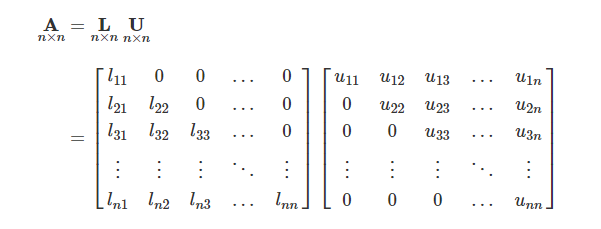

The goal of LU decomposition would be to find the values for each of the non-zero elements in **L** and **U**. We used the following code to generate the standard LU Decomposition involving the Gaussian elimination approach.

In [ ]:
using LinearAlgebra

function standard_lu(A)
    L, U, p = lu(A)
    return L, U
end


standard_lu (generic function with 1 method)

##### 2. Recursive LU Decomposition
A divide-and-conquer strategy that divides the matrix into smaller blocks. It is particularly useful for large matrices. Instead of decomposing the entire matrix at once, recursive LU decomposition divides the matrix into smaller blocks and decomposes them recursively. This approach reduces the memory requirements and allows for parallel processing, making it efficient for large-scale computations. 


In [3]:
function recursive_lu(A)
    n = size(A, 1)
    if n == 1
        return A, I
    end
    m = div(n, 2)
    L1, U1 = lu(A[1:m, 1:m])
    U2 = L1 \ A[1:m, m+1:n]
    L3 = A[m+1:n, 1:m] / U1
    L4, U4 = lu(A[m+1:n, m+1:n] - L3 * U2)
    L = [L1 zeros(m, n-m); L3 L4]
    U = [U1 U2; zeros(n-m, m) U4]
    return L, U
end


recursive_lu (generic function with 1 method)

##### 3. Multilevel Decomposition:
An extension of the recursive LU decomposition, aiming to decompose the matrix into multiple **L** and **U** components. it is useful when dealing with very large matrices, where traditional LU decomposition techniques might be computationally expensive or memory-intensive. It involves breaking down a problem into a hierarchy or series of levels, typically with the goal of solving each subproblem more efficiently. This concept is most commonly applied in numerical linear algebra and the solving of partial differential equations (PDEs). 



In [5]:
function two_level_decomposition(A)
    n, m = size(A)
    mid_row, mid_col = div(n, 2), div(m, 2)
    
    A11 = A[1:mid_row, 1:mid_col]
    A12 = A[1:mid_row, mid_col+1:end]
    A21 = A[mid_row+1:end, 1:mid_col]
    A22 = A[mid_row+1:end, mid_col+1:end]
    
    L1, U1 = lu(A11)
    L2, U2 = lu(A22)
    
    return L1, U1, L2, U2
end


two_level_decomposition (generic function with 1 method)

### LU Decomposition Implementation

LU decomposition (or factorization) is a method used for solving systems of linear equations. The following are our approach of implementing LU decomposition in Python:

We can begin by adding a benchmarking tools to show how good the algorithm performs.

In [13]:
using Pkg
Pkg.add("BenchmarkTools")


   Resolving package versions...
  No Changes to `C:\Users\johns\.julia\environments\v1.9\Project.toml`

  No Changes to `C:\Users\johns\.julia\environments\v1.9\Manifest.toml`


We then generate random n×m matrices filled with values from a standard Gaussian distribution. This step ensures diverse and statistically sound data, essential for reliable analysis.

In [2]:
using Random

function generate_matrix(n, m)
    return randn(n, m)
end


generate_matrix (generic function with 1 method)

We divide matrix into multiple submatrices, performing LU factorization on each submatrix, and then assembling the factorized results of all submatrices into two complete matrices L and U.

In [8]:
using LinearAlgebra

function four_level_decomposition(A)
    n, m = size(A)
    mid_row, mid_col = div(n, 2), div(m, 2)
    
    # Split the matrix into 4 submatrices
    A11 = A[1:mid_row, 1:mid_col]
    A12 = A[1:mid_row, mid_col+1:end]
    A21 = A[mid_row+1:end, 1:mid_col]
    A22 = A[mid_row+1:end, mid_col+1:end]
    
    # Perform LU decomposition on each submatrix
    L11, U11 = lu(A11)
    L12, U12 = lu(A12)
    L21, U21 = lu(A21)
    L22, U22 = lu(A22)
    
    # Further decompose the submatrices
    L11_1, U11_1, L11_2, U11_2 = two_level_decomposition(A11)
    L12_1, U12_1, L12_2, U12_2 = two_level_decomposition(A12)
    L21_1, U21_1, L21_2, U21_2 = two_level_decomposition(A21)
    L22_1, U22_1, L22_2, U22_2 = two_level_decomposition(A22)
    
    return (
        (L11_1, U11_1, L11_2, U11_2),
        (L12_1, U12_1, L12_2, U12_2),
        (L21_1, U21_1, L21_2, U21_2),
        (L22_1, U22_1, L22_2, U22_2)
    )
end

# Test the function
A = randn(4, 4)
decomposition_result = four_level_decomposition(A)


(([1.0;;], [-0.8797048035469732;;], [1.0;;], [1.3257019768946212;;]), ([1.0;;], [-0.8161322839352011;;], [1.0;;], [0.3424945898858133;;]), ([1.0;;], [-0.46707381499739803;;], [1.0;;], [0.0004662157480603231;;]), ([1.0;;], [-2.0638196500021646;;], [1.0;;], [-0.3037844641332837;;]))

In [9]:
using Random

# Function to generate random matrices
function generate_random_matrices(dimensions)
    matrices = []  # Array to hold the generated matrices
    for dim in dimensions
        n, m = dim  # Get the number of rows and columns from the tuple
        matrix = randn(n, m)  # Generate a random matrix of size n x m
        push!(matrices, matrix)  # Add the matrix to the list
    end
    return matrices
end

# Define the dimensions of the matrices you want to generate
dimensions = [(4, 4), (8, 8), (16, 16), (32, 32)]

# Generate the random matrices
random_matrices = generate_random_matrices(dimensions)

# Now random_matrices contains four random matrices of dimensions 4x4, 8x8, 16x16, and 32x32.


4-element Vector{Any}:
 [1.441592888352837 -1.8105032689962786 -0.3936557774476761 -0.04655606191666132; 0.6141408190644972 -0.03664269295296034 -0.1891077513811622 -0.4891592333812733; 1.7891122426571888 -1.5733071684128068 2.3376405928067907 0.558069084513761; -0.270441362102713 0.00746277362200583 1.670095272463324 1.2625314747619825]
 [-0.06797831833147554 0.9509546912019098 … 0.612190180491153 0.8155023198500676; 0.394621130989923 0.8963890518687084 … 1.329898478378236 -0.8282768452157464; … ; 2.0172418906778318 -1.1901632824636523 … 0.6419111460952132 -0.9027665951916032; 1.9052901947594207 -2.4480274958049137 … -0.25222709631877543 -0.025346717211512614]
 [1.0155284175945605 -0.25040222037161575 … 0.36606094484030927 -1.4578168216690073; -1.4028392001664005 -0.598501357455378 … 0.601635483073359 0.5361795190700589; … ; -0.8810994867462402 0.5905855287826487 … -0.3863485783328489 0.6839965561376584; 0.44393121431422733 0.6471194350035866 … 0.30505291659496925 -2.2118264901471885]

We want to generate the matrix and show how well each method of LU decomposition performs using BenchmarkTools using the following code.

In [4]:
using BenchmarkTools

n, m = 100, 100
A = generate_matrix(n, m)

# Benchmark standard LU decomposition
bench_standard_lu = @benchmark standard_lu($A)

# Benchmark recursive LU decomposition
bench_recursive_lu = @benchmark recursive_lu($A)

# Benchmark two level decomposition
bench_two_level = @benchmark two_level_decomposition($A)


UndefVarError: UndefVarError: `standard_lu` not defined

From the implementation of the LU decomposition algorithms, particularly the recursive version as shown above, we now want to show the performance of these algorithms using Julia’s analytical tools. To begin, we want to show how long the algorithm took to solve the matrix and how many bytes it took for each method of LU decomposition. 

In [6]:
using Random, LinearAlgebra, BenchmarkTools

# Function Definitions

function generate_matrix(n, m)
    return randn(n, m)
end

function standard_lu(A)
    L, U, p = lu(A)
    return L, U
end

function recursive_lu(A)
    n = size(A, 1)
    if n == 1
        return A, I
    end
    m = div(n, 2)
    L1, U1 = lu(A[1:m, 1:m])
    U2 = L1 \ A[1:m, m+1:n]
    L3 = A[m+1:n, 1:m] / U1
    L4, U4 = lu(A[m+1:n, m+1:n] - L3 * U2)
    L = [L1 zeros(m, n-m); L3 L4]
    U = [U1 U2; zeros(n-m, m) U4]
    return L, U
end

function two_level_decomposition(A)
    n, m = size(A)
    mid_row, mid_col = div(n, 2), div(m, 2)
    
    A11 = A[1:mid_row, 1:mid_col]
    A12 = A[1:mid_row, mid_col+1:end]
    A21 = A[mid_row+1:end, 1:mid_col]
    A22 = A[mid_row+1:end, mid_col+1:end]
    
    L1, U1 = lu(A11)
    L2, U2 = lu(A22)
    
    return L1, U1, L2, U2
end

# Benchmarking

n, m = 100, 100
A = generate_matrix(n, m)

bench_standard_lu = @benchmark standard_lu($A)
bench_recursive_lu = @benchmark recursive_lu($A)
bench_two_level = @benchmark two_level_decomposition($A)

# Results
println("Standard LU:")
println(bench_standard_lu)

println("\nRecursive LU:")
println(bench_recursive_lu)

println("\nTwo Level Decomposition:")
println(bench_two_level)
function four_level_decomposition(A)
    # First two-level decomposition
    L1, U1, L2, U2 = two_level_decomposition(A)
    
    # Decompose each block further
    L1a, U1a, L1b, U1b = two_level_decomposition(L1)
    L2a, U2a, L2b, U2b = two_level_decomposition(L2)
    
    return L1a, U1a, L1b, U1b, L2a, U2a, L2b, U2b
end

# Benchmarking

bench_four_level = @benchmark four_level_decomposition($A)

# Results

println("\nFour Level Decomposition:")
println(bench_four_level)



Standard LU:

Trial(2.381 ms)



Recursive LU:

Trial(469.400 μs)



Two Level Decomposition:

Trial(91.100 μs)


Four Level Decomposition:

Trial(136.700 μs)


In [7]:
# ... [All previous function definitions and benchmarks]

# Memory Usage Analysis
println("Memory Usage Analysis:")
println("\nStandard LU:")
println("Memory allocated: ", bench_standard_lu.memory, " bytes")

println("\nRecursive LU:")
println("Memory allocated: ", bench_recursive_lu.memory, " bytes")

println("\nTwo Level Decomposition:")
println("Memory allocated: ", bench_two_level.memory, " bytes")

println("\nFour Level Decomposition:")
println("Memory allocated: ", bench_four_level.memory, " bytes")


Memory Usage Analysis:



Standard LU:

Memory allocated: 241936 bytes



Recursive LU:

Memory allocated: 502480 bytes



Two Level Decomposition:

Memory allocated: 201792 bytes



Four Level Decomposition:

Memory allocated: 306496 bytes


er


### Performance Assessment

Using appropriate Julia packages and tools, we manages to to evaluate and compare the performance metrics of the LU decomposition algorithms, including computational time,
memory usage, and accuracy. As stated above, each of the methods has unique properties and it's own potential advantages. Based on the result above, using the matrix generated the multilevel decomposition has the best computational time, memory usage specifically the Two Level Decomposition method. This actively demonstrate that since the generated matrix is quite large, breaking down a problem into a hierarchy or series of levels with the goal of solving each subproblem is more efficient. 